# True Robot Trajectory example

Necessary imports.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import json
import re

Put a `pos.json` file in the `data` directory and specify the `file_name` variable.

In [2]:
file_name = "Rp01_Ac6_Vhigh_Ar1_UNC187_Rxall_pos.json"

# extracting information from the filename
match = re.search(pattern=r"Rp(\d+)_Ac(\d)_V(\w+)_Ar(\d)_UNC(\d+)", string=file_name)
if match == None:
    raise Exception("The filename does not match the standard!")

repetition = int(match[1])
action = int(match[2])
velocity = match[3]
robotic_arm = int(match[4])
motion_uncertainty = int(match[5])/100

print("Extracted information from the filename")
print(f"  - repetition          : {repetition}")
print(f"  - action              : {action}")
print(f"  - velocity            : {velocity}")
print(f"  - robotic arm         : {robotic_arm}")
print(f"  - motion uncertainty  : {motion_uncertainty}")

Extracted information from the filename
  - repetition          : 1
  - action              : 6
  - velocity            : high
  - robotic arm         : 1
  - motion uncertainty  : 1.87


Reading the `pos.json` file.

In [38]:
ee_positions = None      # end effector position in Cartesian coordinates
joint_positions = None   # joint positions
timestamps = []          # storing time stamps [second]
import sys
with open(os.path.join("data", file_name), 'r') as f:
    json_data = json.load(f)
    for module_data in json_data:
        current_robot_number = module_data["robot_number"]
        if current_robot_number != robotic_arm: # The json file contains position of both robots, we only care about the robot performing the action
            continue
        
        timestamps = np.array(module_data["time_stamp_ns"])/1.e9 
        joint_positions = np.array(module_data["joint_positions"]) # 450x7 matrix
        ee_positions = np.array(module_data["EE_positions"]) # 450x3 matrix

Plotting the end effector positions.

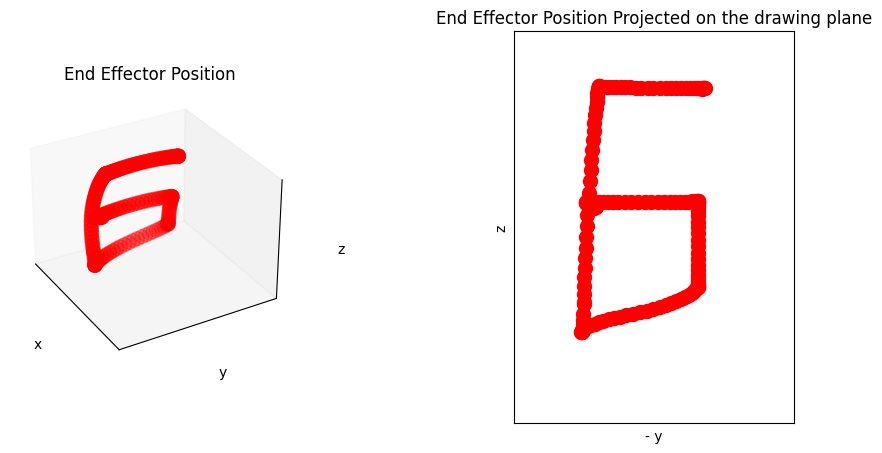

In [52]:
fig = plt.figure(figsize=(8, 4), facecolor='white')
ax3d = fig.add_subplot(1, 2, 1, projection='3d')
ax2d = fig.add_subplot(1, 2, 2)

x = ee_positions[:, 0]
y = ee_positions[:, 1]
z = ee_positions[:, 2]

# 3D plot
ax3d.set_xticks([])
ax3d.set_yticks([])
ax3d.set_zticks([])
ax3d.set_xlabel('x')
ax3d.set_ylabel('y')
ax3d.set_zlabel('z')
ax3d.set_title('End Effector Position')
ax3d.view_init(elev=30, azim=150)

# initial and final parts of the robot's movement, where the robot positions itself 
# from its starting point to the imaginary plane and back, are ommited.
ax3d.scatter(x[70:235], y[70:235], z[70:235], s=100, color='red') 
ax3d.set_xlim([0.1, 1])
ax3d.set_ylim([-0.4, 0.4])
ax3d.set_zlim([0.1, 0.9])

# 2D plot
ax2d.set_xticks([])
ax2d.set_yticks([])
ax2d.set_xlabel('- y')
ax2d.set_ylabel('z')
ax2d.set_title('End Effector Position Projected on the drawing plane')

# initial and final parts of the robot's movement, where the robot positions itself 
# from its starting point to the imaginary plane and back, are omitted.
ax2d.scatter(-y[70:235], z[70:235], s=100, color='red')
ax2d.set_xlim([-0.5, 0.5])
ax2d.set_ylim([0, 1])

plt.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01, wspace=0.8, hspace=0.5)